In [110]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ethereum-crypto-price/ETH-USD.csv


# ethereum crypto price prediction

In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import SVR
plt.style.use('fivethirtyeight')

In [112]:
df=pd.read_csv('/kaggle/input/ethereum-crypto-price/ETH-USD.csv')
df=df.set_index(pd.DatetimeIndex(df['Date'].values))
df=df.head(500)

In [113]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [114]:
df=df.dropna()

In [115]:
df.isna().sum().sum()

0

In [116]:
future_days=15

# create a new column to shifting the data for future days

In [117]:
df[str(future_days)+'_Day_Price_Forecast']=df[['Close']].shift(-future_days)
df[['Close',str(future_days)+'_Day_Price_Forecast']]

,Close,15_Day_Price_Forecast
2017-11-09,320.884003,474.911011
2017-11-10,299.252991,466.276001
2017-11-11,314.681000,471.329987
2017-11-12,307.907990,480.355011
2017-11-13,316.716003,472.902008
...,...,...
2019-03-19,140.519196,NaN
2019-03-20,140.686356,NaN
2019-03-21,136.636063,NaN
2019-03-22,137.181442,NaN


# split the data to x&y

In [118]:
x=np.array(df[['Close']])
x=x[:df.shape[0]-future_days]
print(x)

[[ 320.884003]
 [ 299.252991]
 [ 314.681   ]
 [ 307.90799 ]
 [ 316.716003]
 [ 337.631012]
 [ 333.356995]
 [ 330.924011]
 [ 332.394012]
 [ 347.612   ]
 [ 354.385986]
 [ 366.730011]
 [ 360.401001]
 [ 380.652008]
 [ 410.165985]
 [ 474.911011]
 [ 466.276001]
 [ 471.329987]
 [ 480.355011]
 [ 472.902008]
 [ 427.52301 ]
 [ 447.114014]
 [ 466.540009]
 [ 463.449005]
 [ 465.852997]
 [ 470.20401 ]
 [ 463.281006]
 [ 428.588013]
 [ 434.40799 ]
 [ 456.031006]
 [ 473.502014]
 [ 441.721008]
 [ 515.135986]
 [ 651.43103 ]
 [ 702.767029]
 [ 695.815979]
 [ 684.447998]
 [ 696.208984]
 [ 719.974976]
 [ 794.64502 ]
 [ 826.822998]
 [ 819.085999]
 [ 821.062988]
 [ 674.859985]
 [ 719.387024]
 [ 694.14801 ]
 [ 765.833984]
 [ 773.835999]
 [ 762.84198 ]
 [ 737.02301 ]
 [ 753.59198 ]
 [ 717.257019]
 [ 756.732971]
 [ 772.640991]
 [ 884.44397 ]
 [ 962.719971]
 [ 980.921997]
 [ 997.719971]
 [1041.680054]
 [1153.170044]
 [1148.530029]
 [1299.73999 ]
 [1255.819946]
 [1154.930054]
 [1273.199951]
 [1396.420044]
 [1366.770

In [119]:
y=np.array(df[str(future_days)+'_Day_Price_Forecast'])
y=y[:-future_days]
print(y)

[ 474.911011  466.276001  471.329987  480.355011  472.902008  427.52301
  447.114014  466.540009  463.449005  465.852997  470.20401   463.281006
  428.588013  434.40799   456.031006  473.502014  441.721008  515.135986
  651.43103   702.767029  695.815979  684.447998  696.208984  719.974976
  794.64502   826.822998  819.085999  821.062988  674.859985  719.387024
  694.14801   765.833984  773.835999  762.84198   737.02301   753.59198
  717.257019  756.732971  772.640991  884.44397   962.719971  980.921997
  997.719971 1041.680054 1153.170044 1148.530029 1299.73999  1255.819946
 1154.930054 1273.199951 1396.420044 1366.77002  1291.920044 1053.689941
 1014.25     1036.280029 1039.099976 1155.150024 1049.579956 1003.26001
  986.229004 1058.780029 1056.030029 1055.170044 1107.069946 1246.01001
 1182.359985 1071.130005 1118.310059 1036.790039  915.784973  964.018982
  834.682007  697.950989  793.122009  757.067993  817.807007  883.86499
  860.414978  814.659973  868.70697   845.257996  923.56

# split the data to train and test

In [120]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=42)

# training SVR model

In [121]:
from sklearn.svm import SVR
svr=SVR(kernel='rbf',C=1000,gamma=.000001)
svr.fit(x_train,y_train)

SVR(C=1000, gamma=1e-06)

# testing SVR model

In [122]:
svr.score(x_test,y_test)

0.8352440844805904

# comparing between actual and predicted data

In [123]:
y_pred=svr.predict(x_test)
print(y_pred[:10])
print()
print(y_test[:10])

[150.14288519 134.56877387 708.68612252 112.91599839 118.63991934
 348.15557493 118.82359865 188.53559654 127.82765369 436.294559  ]

[123.74192  133.711594 601.755005 121.390205 154.58194  605.39502
  91.685654 205.365997 140.519196 434.424011]


In [124]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [125]:
print(mean_absolute_error(y_pred,y_test))

79.1367676226624


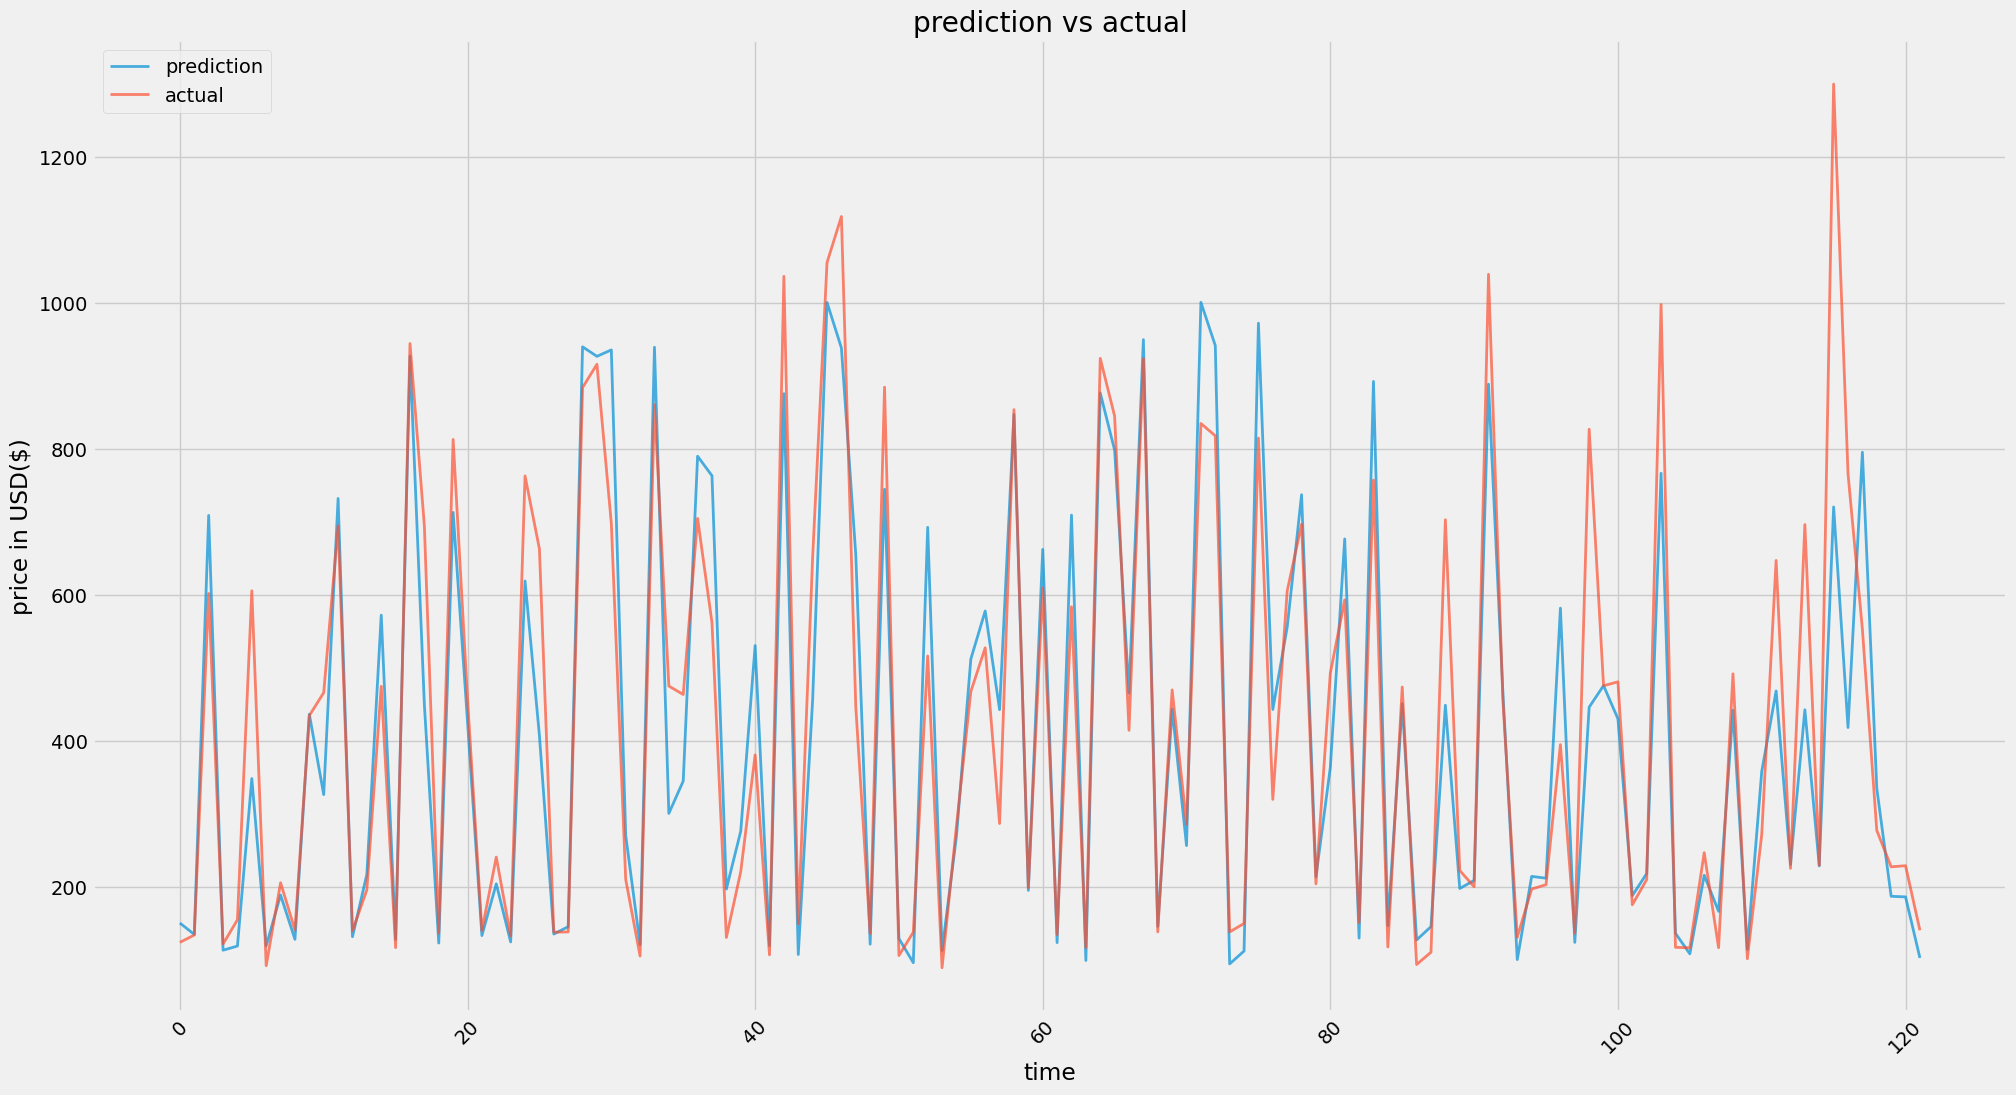

In [126]:
plt.figure(figsize=(22,12))
plt.plot(y_pred,label='prediction',lw=2,alpha=.7)
plt.plot(y_test,label='actual',lw=2,alpha=.7)
plt.title('prediction vs actual')
plt.xlabel('time')
plt.ylabel('price in USD($)')
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.show()